# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.7.1'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
183702,2020-08-16,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183703,2020-08-17,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183704,2020-08-18,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183705,2020-08-19,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183706,2020-08-20,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
183702,2020-08-16,Colombia,Vichada,14,9,0,5
183703,2020-08-17,Colombia,Vichada,14,9,0,5
183704,2020-08-18,Colombia,Vichada,14,9,0,5
183705,2020-08-19,Colombia,Vichada,14,9,0,5
183706,2020-08-20,Colombia,Vichada,14,9,0,5


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
150,2020-08-16,17714,3778,340,13596
151,2020-08-17,17875,3775,341,13759
152,2020-08-18,18082,3723,344,14015
153,2020-08-19,18268,3521,347,14400
154,2020-08-20,18607,3447,348,14812


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-08-16,21676771,7299392,771802,13605577,0.017803,0.313828,0.053682
2020-08-17,21878848,7286232,775842,13816774,0.017730,0.315756,0.053167
2020-08-18,22128769,7303200,782607,14042962,0.017683,0.317301,0.052788
2020-08-19,22386379,7340584,788828,14256967,0.017618,0.318430,0.052428
2020-08-20,22387598,7340227,788840,14258531,0.017618,0.318447,0.052424


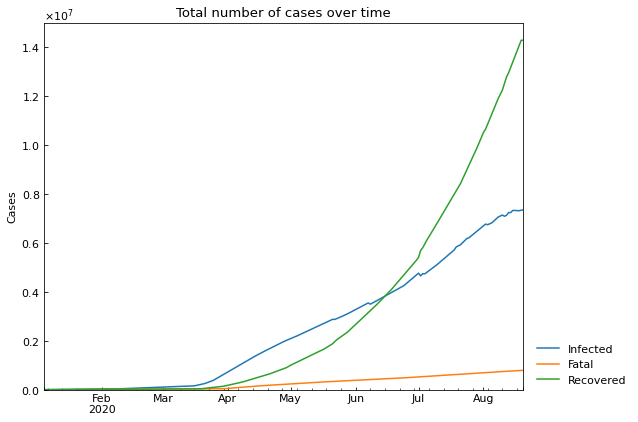

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
189,2020-08-16,56137,14959,1103,40075
190,2020-08-17,56783,14481,1118,41184
191,2020-08-18,57702,14294,1134,42274
192,2020-08-19,58772,13804,1148,43820
193,2020-08-20,59956,13546,1159,45251


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
187,2020-08-16,54714,13546,1088,40080
188,2020-08-17,55667,13372,1099,41196
189,2020-08-18,56685,13286,1115,42284
190,2020-08-19,57550,12587,1128,43835
191,2020-08-20,58501,12091,1144,45266


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
183702,2020-08-16,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183703,2020-08-17,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183704,2020-08-18,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183705,2020-08-19,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183706,2020-08-20,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
180198,COL,Colombia,Vichada,2020-08-16,107808
180199,COL,Colombia,Vichada,2020-08-17,107808
180200,COL,Colombia,Vichada,2020-08-18,107808
180201,COL,Colombia,Vichada,2020-08-19,107808
180202,COL,Colombia,Vichada,2020-08-20,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
183702,2020-08-16,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183703,2020-08-17,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183704,2020-08-18,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183705,2020-08-19,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183706,2020-08-20,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
183702,2020-08-16,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
183703,2020-08-17,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
183704,2020-08-18,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
183705,2020-08-19,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
183706,2020-08-20,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
225,2020-08-16,1,1,1,0,0,1,1,3,2,2,1,30.56
226,2020-08-17,1,1,1,0,0,1,1,3,2,2,1,30.56
227,2020-08-18,1,1,1,0,0,1,1,3,2,2,1,30.56
228,2020-08-19,1,1,1,0,0,1,1,3,2,2,1,30.56
229,2020-08-20,1,1,1,0,0,1,1,3,2,2,1,30.56


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
225,2020-08-16,1,1,1,0,0,1,1,3,2,2,1,30.56
226,2020-08-17,1,1,1,0,0,1,1,3,2,2,1,30.56
227,2020-08-18,1,1,1,0,0,1,1,3,2,2,1,30.56
228,2020-08-19,1,1,1,0,0,1,1,3,2,2,1,30.56
229,2020-08-20,1,1,1,0,0,1,1,3,2,2,1,30.56


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

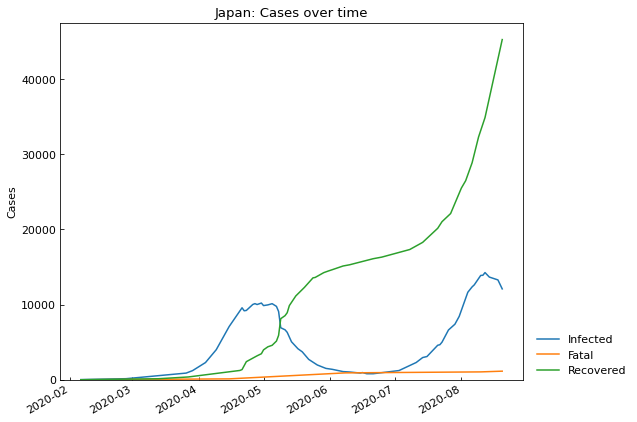

,Date,Confirmed,Infected,Fatal,Recovered
187,2020-08-16,54714,13546,1088,40080
188,2020-08-17,55667,13372,1099,41196
189,2020-08-18,56685,13286,1115,42284
190,2020-08-19,57550,12587,1128,43835
191,2020-08-20,58501,12091,1144,45266


In [26]:
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

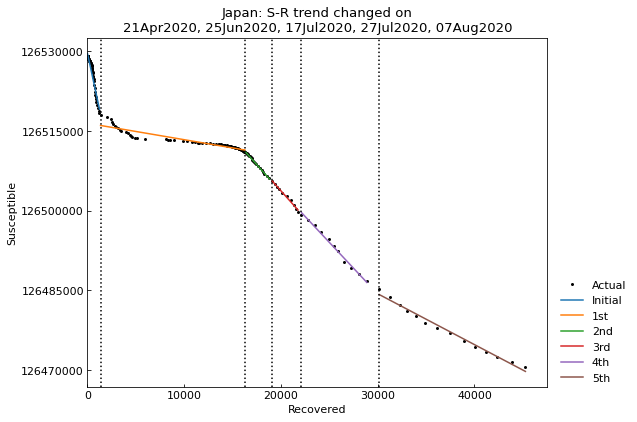

,Type,Start,End,Population
1st,Past,21Apr2020,24Jun2020,126529100
2nd,Past,25Jun2020,16Jul2020,126529100
3rd,Past,17Jul2020,26Jul2020,126529100
4th,Past,27Jul2020,06Aug2020,126529100
5th,Past,07Aug2020,20Aug2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	5th phase (07Aug2020 - 20Aug2020): finished 1723 trials in 1 min  0 sec

	2nd phase (25Jun2020 - 16Jul2020): finished  258 trials in 0 min  5 sec

	3rd phase (17Jul2020 - 26Jul2020): finished  265 trials in 0 min  5 sec

	4th phase (27Jul2020 - 06Aug2020): finished  712 trials in 0 min 15 sec

	1st phase (21Apr2020 - 24Jun2020): finished 2124 trials in 1 min  0 sec

Completed optimization. Total: 2 min  1 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/gamma [day],1/alpha2 [day],alpha1 [-],1/beta [day],RMSLE,Trials,Runtime
1st,Past,21Apr2020,24Jun2020,126529100,SIR-F,0.39,0.111156,0.000214,0.030620,0.069591,1440,14,4667,0.111,32,0.692253,2124,1 min 0 sec
2nd,Past,25Jun2020,16Jul2020,126529100,SIR-F,1.83,0.000798,0.000899,0.137933,0.074239,1440,13,1112,0.001,7,0.076872,258,0 min 5 sec
3rd,Past,17Jul2020,26Jul2020,126529100,SIR-F,2.11,0.000623,0.000151,0.137130,0.064709,1440,15,6611,0.001,7,0.021571,265,0 min 5 sec
4th,Past,27Jul2020,06Aug2020,126529100,SIR-F,1.85,0.000741,0.000158,0.124379,0.067094,1440,14,6336,0.001,8,0.034442,712,0 min 15 sec
5th,Past,07Aug2020,20Aug2020,126529100,SIR-F,1.06,0.000951,0.000501,0.085155,0.079460,1440,12,1996,0.001,11,0.050422,1723,1 min 0 sec


### Accuracy of estimation

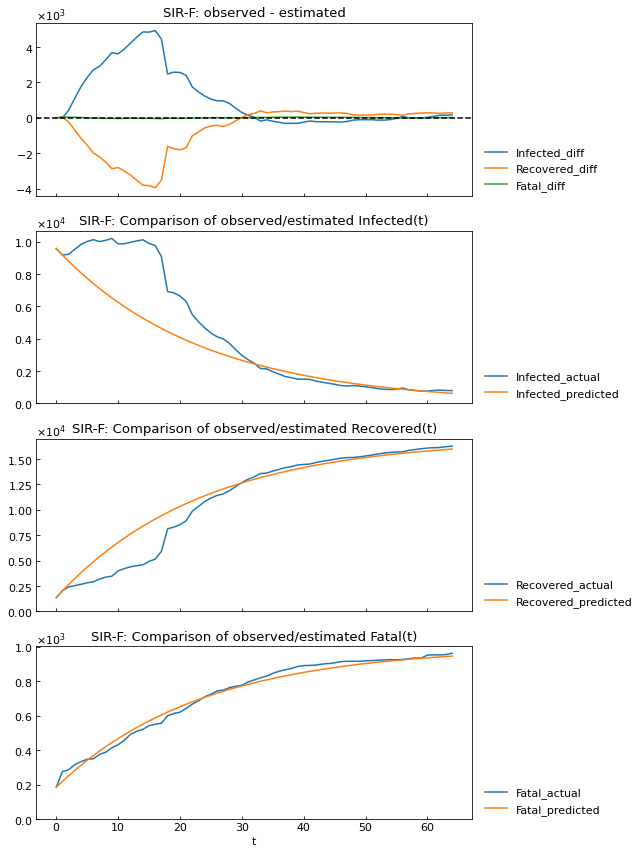

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.85

### Show parameter history

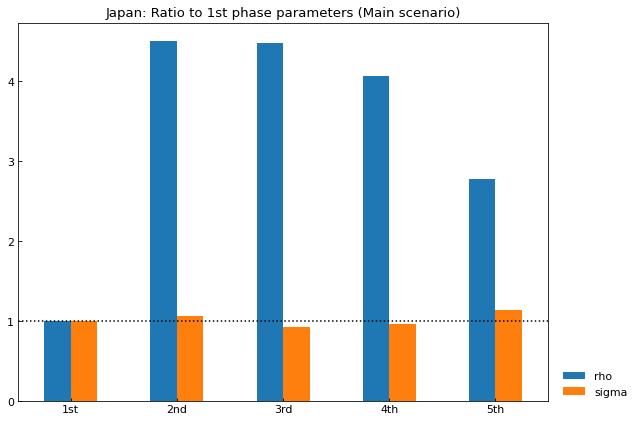

,1st,2nd,3rd,4th,5th
rho,1.0,4.504694,4.478496,4.062046,2.781035
sigma,1.0,1.066795,0.929842,0.964128,1.141811


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

### Show the history of reproduction number

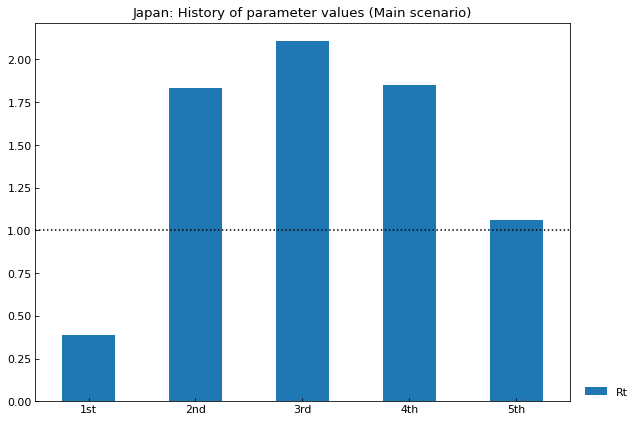

,1st,2nd,3rd,4th,5th
Rt,0.39,1.83,2.11,1.85,1.06


In [33]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

### Simulate the number of cases

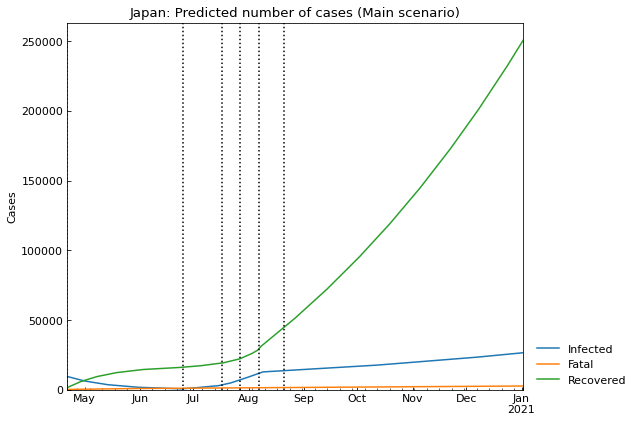

,Date,Confirmed,Fatal,Infected,Recovered
252,2020-12-29,271043,2588,26007,242448
253,2020-12-30,273259,2603,26136,244520
254,2020-12-31,275485,2618,26265,246602
255,2021-01-01,277722,2633,26395,248694
256,2021-01-02,279971,2649,26525,250797


In [34]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [35]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.07945963879636944

In [36]:
sigma_new = sigma_current * 2
sigma_new

0.15891927759273888

In [37]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     1st      Past  21Apr2020  24Jun2020   126529100  SIR-F  0.39   
         2nd      Past  25Jun2020  16Jul2020   126529100  SIR-F  1.83   
         3rd      Past  17Jul2020  26Jul2020   126529100  SIR-F  2.11   
         4th      Past  27Jul2020  06Aug2020   126529100  SIR-F  1.85   
         5th      Past  07Aug2020  20Aug2020   126529100  SIR-F  1.06   
         6th    Future  21Aug2020  01Jan2021   126529100  SIR-F  1.06   
Medicine 1st      Past  21Apr2020  24Jun2020   126529100  SIR-F  0.39   
         2nd      Past  25Jun2020  16Jul2020   126529100  SIR-F  1.83   
         3rd      Past  17Jul2020  26Jul2020   126529100  SIR-F  2.11   
         4th      Past  27Jul2020  06Aug2020   126529100  SIR-F  1.85   
         5th      Past  07Aug2020  20Aug2020   126529100  SIR-F  1.06   
         6th    Future  21Aug2020  20Sep2020   126529100  SIR-F  1.06   
         7th    Future  21Sep2020  01Jan2021   126529100  SIR-F  0.53   

                   theta     kappa       rho     sigma   tau  1/gamma [day]  \
Scenario Phase                                                                
Main     1st    0.111156  0.000214  0.030620  0.069591  1440             14   
         2nd    0.000798  0.000899  0.137933  0.074239  1440             13   
         3rd    0.000623  0.000151  0.137130  0.064709  1440             15   
         4th    0.000741  0.000158  0.124379  0.067094  1440             14   
         5th    0.000951  0.000501  0.085155  0.079460  1440             12   
         6th    0.000951  0.000501  0.085155  0.079460  1440             12   
Medicine 1st    0.111156  0.000214  0.030620  0.069591  1440             14   
         2nd    0.000798  0.000899  0.137933  0.074239  1440             13   
         3rd    0.000623  0.000151  0.137130  0.064709  1440             15   
         4th    0.000741  0.000158  0.124379  0.067094  1440             14   
         5th    0.000951  0.000501  0.085155  0.079460  1440             12   
         6th    0.000951  0.000501  0.085155  0.079460  1440             12   
         7th    0.000951  0.000501  0.085155  0.158919  1440              6   

                1/alpha2 [day]  alpha1 [-]  1/beta [day]      RMSLE Trials  \
Scenario Phase                                                               
Main     1st              4667       0.111            32   0.692253   2124   
         2nd              1112       0.001             7  0.0768721    258   
         3rd              6611       0.001             7  0.0215711    265   
         4th              6336       0.001             8  0.0344423    712   
         5th              1996       0.001            11  0.0504218   1723   
         6th              1996       0.001            11          -      -   
Medicine 1st              4667       0.111            32   0.692253   2124   
         2nd              1112       0.001             7  0.0768721    258   
         3rd              6611       0.001             7  0.0215711    265   
         4th              6336       0.001             8  0.0344423    712   
         5th              1996       0.001            11  0.0504218   1723   
         6th              1996       0.001            11          -      -   
         7th              1996       0.001            11          -      -   

                     Runtime  
Scenario Phase                
Main     1st    1 min  0 sec  
         2nd    0 min  5 sec  
         3rd    0 min  5 sec  
         4th    0 min 15 sec  
         5th    1 min  0 sec  
         6th               -  
Medicine 1st    1 min  0 sec  
         2nd    0 min  5 sec  
         3rd    0 min  5 sec  
         4th    0 min 15 sec  
         5th    1 min  0 sec  
         6th               -  
         7th               -

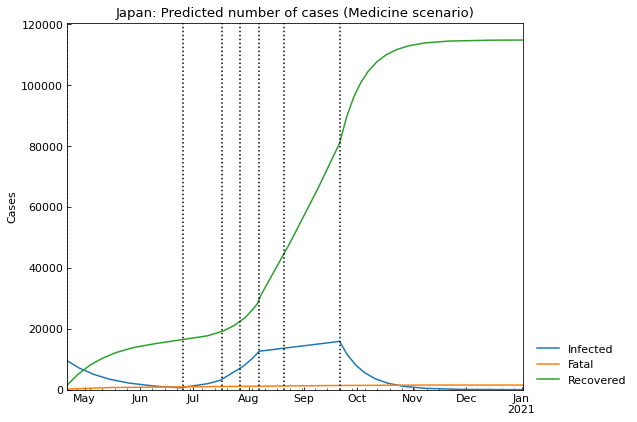

,Date,Confirmed,Fatal,Infected,Recovered
252,2020-12-29,116273,1529,10,114734
253,2020-12-30,116274,1529,9,114736
254,2020-12-31,116275,1529,9,114737
255,2021-01-01,116276,1529,8,114739
256,2021-01-02,116277,1529,8,114740


In [38]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [39]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,7th_Rt
Main,26525,02Jan2021,26525,2649,-
Medicine,15863,21Sep2020,8,1529,0.53
